ENSEMBLE ML MODEL FOR SKILL GAP PREDICTION

1. Loading data...
Dataset shape: (3000, 35)

2. Preprocessing...
Final shape: (3000, 39)

3. Preparing train/val/test splits...
Train: 2100, Val: 450, Test: 450
Number of classes: 72

4. Training Skill Gap Score Model (Random Forest)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished



✅ Skill Gap Model:
   Validation MAE: 6.43
   Test MAE: 6.12

5. Training Time to Ready Model (Gradient Boosting)
      Iter       Train Loss   Remaining Time 
         1           9.2863            6.13s
         2           8.1679            5.49s
         3           7.2226            5.25s
         4           6.2972            5.13s
         5           5.5850            5.04s
         6           4.9862            4.97s
         7           4.3925            4.94s
         8           4.0409            4.96s
         9           3.6002            4.95s
        10           3.2775            4.90s
        20           1.2718            4.64s
        30           0.5110            4.37s
        40           0.1969            4.12s
        50           0.0999            3.86s
        60           0.0501            3.60s
        70           0.0301            3.34s
        80           0.0192            3.06s
        90           0.0112            2.80s
       100           0.0073  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   


✅ Top Missing Skill Model:
   Validation Accuracy: 29.11%
   Test Accuracy: 30.00%
   Top-3 Accuracy: 82.67%
   Top-5 Accuracy: 92.22%

FINAL TEST SET RESULTS

📊 Regression Metrics:
   Skill Gap Score MAE:  6.12 points (out of 60)
   Time to Ready MAE:    1.57 months (out of 15)

🎯 Classification Metrics:
   Top-1 Accuracy:       30.00%
   Top-3 Accuracy:       82.67%
   Top-5 Accuracy:       92.22%

TOP 10 MOST IMPORTANT FEATURES

For Classification:
   1. target_role: 0.1675
   2. avg_project_complexity: 0.0628
   3. percentage: 0.0589
   4. avg_course_grade: 0.0589
   5. avg_performance: 0.0567
   6. skill_project_ratio: 0.0551
   7. total_skills: 0.0505
   8. field_of_study: 0.0496
   9. target_sector: 0.0459
   10. num_courses: 0.0455

SAMPLE PREDICTIONS (First 15)

Sample 1:
  Skill Gap:  26.7 (Actual: 44) - Error: 17.3
  Time:       10.5 months (Actual: 9) - Error: 1.5
  Predicted:  3D Reconstruction (10.9%)
  Actual:     DICOM Standards ✗
  Top-3: 3D Reconstruction(11%), DICOM

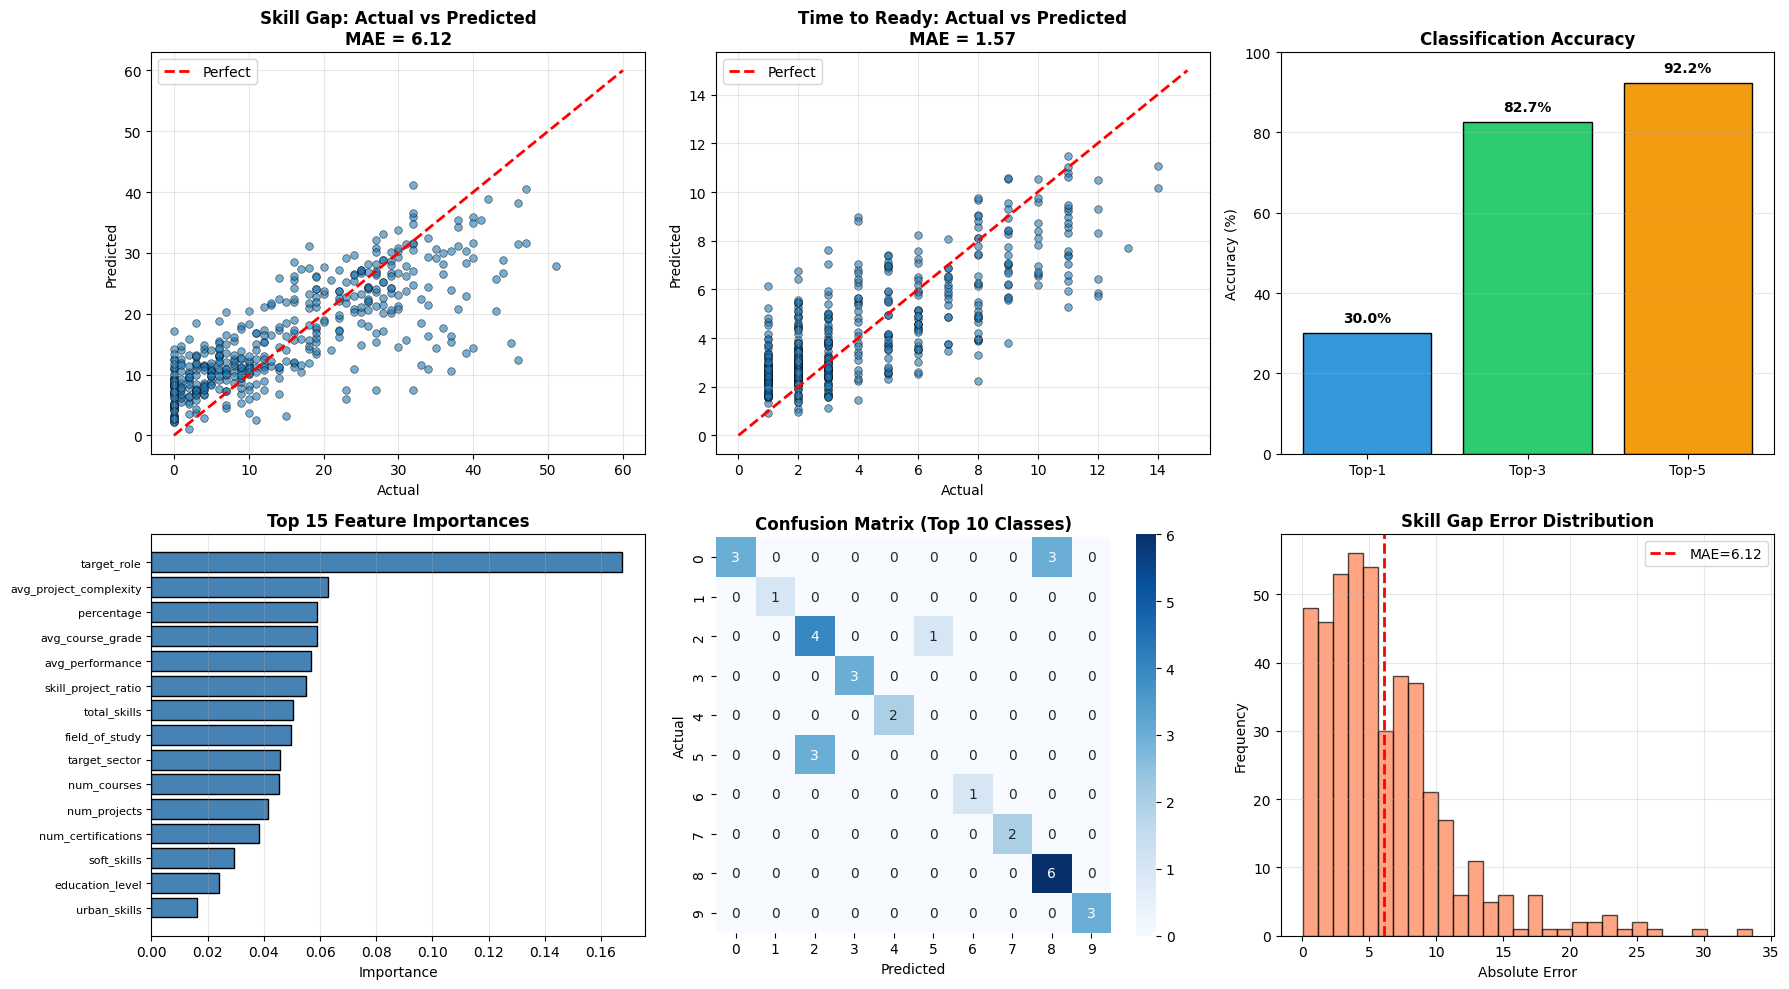


8. Saving models...
✅ Saved models:
   - skill_gap_model.pkl
   - time_model.pkl
   - skill_classifier.pkl
   - scaler.pkl
   - label_encoders.pkl

TRAINING COMPLETE! 🎉

Models are ready for deployment!
Use the saved .pkl files to make predictions on new data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
import pickle

# Set random seed
np.random.seed(42)

print("="*70)
print("ENSEMBLE ML MODEL FOR SKILL GAP PREDICTION")
print("="*70)

# ===== LOAD DATA =====
print("\n1. Loading data...")
df = pd.read_csv('synthetic_training_data_final.csv')
print(f"Dataset shape: {df.shape}")

# ===== PREPROCESSING =====
print("\n2. Preprocessing...")

# Drop user_id
df = df.drop(columns=['user_id'])

# Handle missing values
df['courses_names'] = df['courses_names'].fillna('No courses')
df['certification_names'] = df['certification_names'].fillna('No certifications')

# Label encode categorical columns
label_encoders = {}
cat_cols = ['field_of_study', 'target_sector', 'target_role', 'top_missing_skill']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature engineering
df['total_skills'] = df['num_courses'] + df['num_certifications'] + df['num_projects']
df['avg_performance'] = (df['percentage'] + df['avg_course_grade']) / 2
df['skill_project_ratio'] = df['num_certifications'] / (df['num_projects'] + 1)

# Domain-specific skill counts
df['healthcare_skills'] = (
    df['has_ehr'] + df['has_hl7_fhir'] + df['has_medical_imaging'] +
    df['has_healthcare_security'] + df['has_telemedicine']
)
df['agri_skills'] = (
    df['has_iot_sensors'] + df['has_drone_ops'] + df['has_precision_ag'] +
    df['has_crop_modeling'] + df['has_soil_analysis']
)
df['urban_skills'] = (
    df['has_gis'] + df['has_smart_grid'] + df['has_traffic_mgmt'] +
    df['has_urban_iot'] + df['has_building_auto']
)
df['soft_skills'] = (
    df['has_communication'] + df['has_teamwork'] +
    df['has_problem_solving'] + df['has_leadership']
)

# Drop text columns
df = df.drop(columns=['courses_names', 'certification_names'])

print(f"Final shape: {df.shape}")

# ===== PREPARE DATA =====
print("\n3. Preparing train/val/test splits...")

# Features and targets
feature_cols = [col for col in df.columns if col not in ['skill_gap_score', 'time_to_ready_months', 'top_missing_skill']]
X = df[feature_cols].values
y_gap = df['skill_gap_score'].values
y_time = df['time_to_ready_months'].values
y_skill = df['top_missing_skill'].values

# Train/test split
X_train, X_temp, y_gap_train, y_gap_temp, y_time_train, y_time_temp, y_skill_train, y_skill_temp = train_test_split(
    X, y_gap, y_time, y_skill, test_size=0.30, random_state=42, stratify=y_skill
)

X_val, X_test, y_gap_val, y_gap_test, y_time_val, y_time_test, y_skill_val, y_skill_test = train_test_split(
    X_temp, y_gap_temp, y_time_temp, y_skill_temp, test_size=0.50, random_state=42, stratify=y_skill_temp
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")
print(f"Number of classes: {len(np.unique(y_skill))}")

# ===== MODEL 1: SKILL GAP SCORE PREDICTION =====
print("\n" + "="*70)
print("4. Training Skill Gap Score Model (Random Forest)")
print("="*70)

gap_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gap_model.fit(X_train_scaled, y_gap_train)
gap_pred_val = gap_model.predict(X_val_scaled)
gap_pred_test = gap_model.predict(X_test_scaled)

gap_mae_val = mean_absolute_error(y_gap_val, gap_pred_val)
gap_mae_test = mean_absolute_error(y_gap_test, gap_pred_test)

print(f"\n✅ Skill Gap Model:")
print(f"   Validation MAE: {gap_mae_val:.2f}")
print(f"   Test MAE: {gap_mae_test:.2f}")

# ===== MODEL 2: TIME TO READY PREDICTION =====
print("\n" + "="*70)
print("5. Training Time to Ready Model (Gradient Boosting)")
print("="*70)

time_model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    verbose=1
)

time_model.fit(X_train_scaled, y_time_train)
time_pred_val = time_model.predict(X_val_scaled)
time_pred_test = time_model.predict(X_test_scaled)

time_mae_val = mean_absolute_error(y_time_val, time_pred_val)
time_mae_test = mean_absolute_error(y_time_test, time_pred_test)

print(f"\n✅ Time to Ready Model:")
print(f"   Validation MAE: {time_mae_val:.2f}")
print(f"   Test MAE: {time_mae_test:.2f}")

# ===== MODEL 3: TOP MISSING SKILL CLASSIFICATION =====
print("\n" + "="*70)
print("6. Training Top Missing Skill Model (Random Forest)")
print("="*70)

skill_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

skill_model.fit(X_train_scaled, y_skill_train)
skill_pred_val = skill_model.predict(X_val_scaled)
skill_pred_test = skill_model.predict(X_test_scaled)
skill_pred_proba_test = skill_model.predict_proba(X_test_scaled)

# Calculate accuracies
skill_acc_val = accuracy_score(y_skill_val, skill_pred_val)
skill_acc_test = accuracy_score(y_skill_test, skill_pred_test)

# Top-k accuracies
def top_k_accuracy(y_true, y_pred_proba, k):
    top_k_preds = np.argsort(y_pred_proba, axis=1)[:, -k:]
    correct = sum([1 for i, true in enumerate(y_true) if true in top_k_preds[i]])
    return correct / len(y_true)

top3_acc = top_k_accuracy(y_skill_test, skill_pred_proba_test, 3)
top5_acc = top_k_accuracy(y_skill_test, skill_pred_proba_test, 5)

print(f"\n✅ Top Missing Skill Model:")
print(f"   Validation Accuracy: {skill_acc_val*100:.2f}%")
print(f"   Test Accuracy: {skill_acc_test*100:.2f}%")
print(f"   Top-3 Accuracy: {top3_acc*100:.2f}%")
print(f"   Top-5 Accuracy: {top5_acc*100:.2f}%")

# ===== FINAL RESULTS =====
print("\n" + "="*70)
print("FINAL TEST SET RESULTS")
print("="*70)
print(f"\n📊 Regression Metrics:")
print(f"   Skill Gap Score MAE:  {gap_mae_test:.2f} points (out of 60)")
print(f"   Time to Ready MAE:    {time_mae_test:.2f} months (out of 15)")
print(f"\n🎯 Classification Metrics:")
print(f"   Top-1 Accuracy:       {skill_acc_test*100:.2f}%")
print(f"   Top-3 Accuracy:       {top3_acc*100:.2f}%")
print(f"   Top-5 Accuracy:       {top5_acc*100:.2f}%")

# ===== FEATURE IMPORTANCE =====
print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*70)

feature_names = feature_cols
importances = skill_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

print("\nFor Classification:")
for i, idx in enumerate(indices, 1):
    print(f"   {i}. {feature_names[idx]}: {importances[idx]:.4f}")

# ===== SAMPLE PREDICTIONS =====
print("\n" + "="*70)
print("SAMPLE PREDICTIONS (First 15)")
print("="*70)

correct = 0
for i in range(15):
    pred_skill = skill_pred_test[i]
    actual_skill = y_skill_test[i]

    # Get skill names
    pred_skill_name = label_encoders['top_missing_skill'].inverse_transform([pred_skill])[0]
    actual_skill_name = label_encoders['top_missing_skill'].inverse_transform([actual_skill])[0]

    match = pred_skill == actual_skill
    if match:
        correct += 1

    # Top 3 predictions
    top3_idx = np.argsort(skill_pred_proba_test[i])[-3:][::-1]
    top3_probs = skill_pred_proba_test[i][top3_idx]

    print(f"\nSample {i+1}:")
    print(f"  Skill Gap:  {gap_pred_test[i]:.1f} (Actual: {y_gap_test[i]}) - Error: {abs(gap_pred_test[i] - y_gap_test[i]):.1f}")
    print(f"  Time:       {time_pred_test[i]:.1f} months (Actual: {y_time_test[i]}) - Error: {abs(time_pred_test[i] - y_time_test[i]):.1f}")
    print(f"  Predicted:  {pred_skill_name} ({skill_pred_proba_test[i][pred_skill]*100:.1f}%)")
    print(f"  Actual:     {actual_skill_name} {'✓' if match else '✗'}")
    if not match:
        top3_names = label_encoders['top_missing_skill'].inverse_transform(top3_idx)
        print(f"  Top-3: {top3_names[0]}({top3_probs[0]*100:.0f}%), {top3_names[1]}({top3_probs[1]*100:.0f}%), {top3_names[2]}({top3_probs[2]*100:.0f}%)")

print(f"\nAccuracy on samples: {correct}/15 = {correct/15*100:.1f}%")

# ===== VISUALIZATIONS =====
print("\n7. Creating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Skill gap predictions
axes[0, 0].scatter(y_gap_test, gap_pred_test, alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([0, 60], [0, 60], 'r--', linewidth=2, label='Perfect')
axes[0, 0].set_title(f'Skill Gap: Actual vs Predicted\nMAE = {gap_mae_test:.2f}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Time predictions
axes[0, 1].scatter(y_time_test, time_pred_test, alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
axes[0, 1].plot([0, 15], [0, 15], 'r--', linewidth=2, label='Perfect')
axes[0, 1].set_title(f'Time to Ready: Actual vs Predicted\nMAE = {time_mae_test:.2f}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Classification accuracy bar
metrics = ['Top-1', 'Top-3', 'Top-5']
values = [skill_acc_test*100, top3_acc*100, top5_acc*100]
bars = axes[0, 2].bar(metrics, values, color=['#3498db', '#2ecc71', '#f39c12'], edgecolor='black')
axes[0, 2].set_title('Classification Accuracy', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Accuracy (%)')
axes[0, 2].set_ylim(0, 100)
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + 2, f'{val:.1f}%',
                    ha='center', va='bottom', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Feature importance
top_features = 15
indices = np.argsort(importances)[::-1][:top_features]
axes[1, 0].barh(range(top_features), importances[indices][::-1], color='steelblue', edgecolor='black')
axes[1, 0].set_yticks(range(top_features))
axes[1, 0].set_yticklabels([feature_names[i] for i in indices[::-1]], fontsize=8)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 15 Feature Importances', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Confusion matrix (top 10 classes)
top_10_classes = np.argsort(np.bincount(y_skill_test))[-10:]
mask = np.isin(y_skill_test, top_10_classes)
cm = confusion_matrix(y_skill_test[mask], skill_pred_test[mask], labels=top_10_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=True, square=True)
axes[1, 1].set_title('Confusion Matrix (Top 10 Classes)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Error distribution
errors_gap = np.abs(y_gap_test - gap_pred_test)
axes[1, 2].hist(errors_gap, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(gap_mae_test, color='red', linestyle='--', linewidth=2, label=f'MAE={gap_mae_test:.2f}')
axes[1, 2].set_title('Skill Gap Error Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Absolute Error')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_results.png', dpi=150, bbox_inches='tight')
print("✅ Saved: model_results.png")
plt.show()

# ===== SAVE MODELS =====
print("\n8. Saving models...")
pickle.dump(gap_model, open('skill_gap_model.pkl', 'wb'))
pickle.dump(time_model, open('time_model.pkl', 'wb'))
pickle.dump(skill_model, open('skill_classifier.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(label_encoders, open('label_encoders.pkl', 'wb'))

print("✅ Saved models:")
print("   - skill_gap_model.pkl")
print("   - time_model.pkl")
print("   - skill_classifier.pkl")
print("   - scaler.pkl")
print("   - label_encoders.pkl")

print("\n" + "="*70)
print("TRAINING COMPLETE! 🎉")
print("="*70)
print("\nModels are ready for deployment!")
print("Use the saved .pkl files to make predictions on new data.")

In [ ]:
print(feature_cols)
pickle.dump(feature_cols, open("feature_order.pkl", "wb"))


['education_level', 'field_of_study', 'percentage', 'has_ehr', 'has_hl7_fhir', 'has_medical_imaging', 'has_healthcare_security', 'has_telemedicine', 'has_iot_sensors', 'has_drone_ops', 'has_precision_ag', 'has_crop_modeling', 'has_soil_analysis', 'has_gis', 'has_smart_grid', 'has_traffic_mgmt', 'has_urban_iot', 'has_building_auto', 'num_courses', 'avg_course_grade', 'num_projects', 'avg_project_complexity', 'num_certifications', 'has_communication', 'has_teamwork', 'has_problem_solving', 'has_leadership', 'target_sector', 'target_role', 'total_skills', 'avg_performance', 'skill_project_ratio', 'healthcare_skills', 'agri_skills', 'urban_skills', 'soft_skills']
